<a href="https://colab.research.google.com/github/Kritikargv17/Deep-Learning-LAB/blob/main/Exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

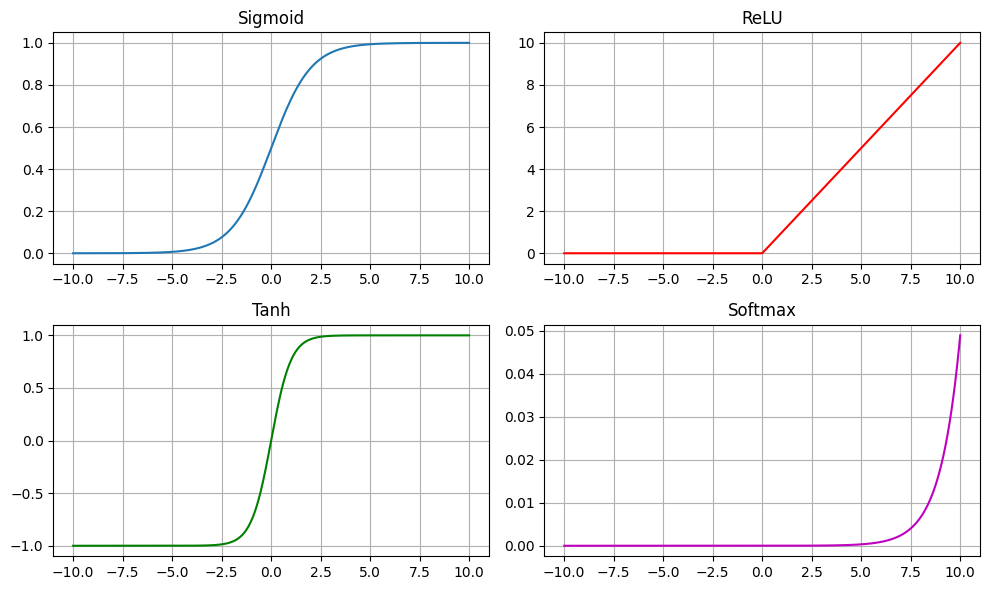

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam





x = np.linspace(-10, 10, 400)

# Sigmoid
sigmoid = 1 / (1 + np.exp(-x))

# ReLU
relu = np.maximum(0, x)

# Tanh
tanh = np.tanh(x)

# Softmax
softmax = np.exp(x) / np.sum(np.exp(x))

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1); plt.plot(x, sigmoid); plt.title("Sigmoid"); plt.grid()
plt.subplot(2, 2, 2); plt.plot(x, relu, color="r"); plt.title("ReLU"); plt.grid()
plt.subplot(2, 2, 3); plt.plot(x, tanh, color="g"); plt.title("Tanh"); plt.grid()
plt.subplot(2, 2, 4); plt.plot(x, softmax, color="m"); plt.title("Softmax"); plt.grid()
plt.tight_layout(); plt.show()

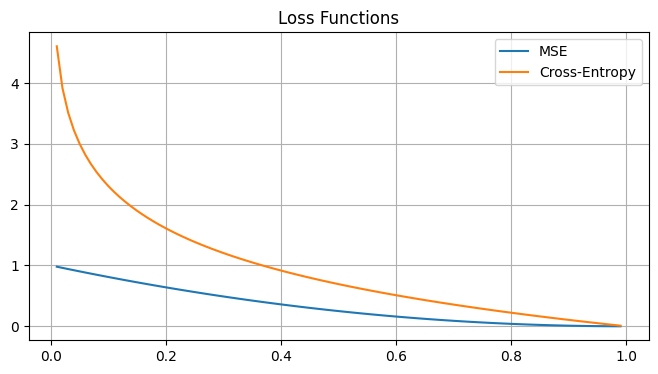

In [2]:
y_true = np.array([0, 0, 1, 1])
y_pred = np.linspace(0.01, 0.99, 100)

mse_loss = (y_true[2] - y_pred) ** 2
cross_entropy_loss = - (y_true[2] * np.log(y_pred) + (1 - y_true[2]) * np.log(1 - y_pred))

plt.figure(figsize=(8, 4))
plt.plot(y_pred, mse_loss, label="MSE")
plt.plot(y_pred, cross_entropy_loss, label="Cross-Entropy")
plt.title("Loss Functions")
plt.legend(); plt.grid(); plt.show()


In [5]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

# Separate labels and features
y_train = train_df["label"].values
x_train = train_df.drop("label", axis=1).values

y_test = test_df["label"].values
x_test = test_df.drop("label", axis=1).values

# Reshape into images (28x28) and normalize
x_train = x_train.reshape(-1, 28, 28) / 255.0
x_test = x_test.reshape(-1, 28, 28) / 255.0

# One-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Smaller subset for quick training
x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train_cat, test_size=0.9, random_state=42)



In [6]:
def build_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model




optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "SGD+Momentum": SGD(learning_rate=0.01, momentum=0.9),
    "Adam": Adam(learning_rate=0.001)
}

histories = {}

for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    model = build_model(opt)
    history = model.fit(x_train_small, y_train_small, validation_data=(x_test, y_test_cat),
                        epochs=5, batch_size=128, verbose=1)
    histories[name] = (model, history)


Training with SGD optimizer...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.1365 - loss: 2.3380 - val_accuracy: 0.2387 - val_loss: 2.1875
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2865 - loss: 2.1514 - val_accuracy: 0.3265 - val_loss: 2.0762
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3663 - loss: 2.0385 - val_accuracy: 0.4330 - val_loss: 1.9923
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4684 - loss: 1.9589 - val_accuracy: 0.4577 - val_loss: 1.9056
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4955 - loss: 1.8736 - val_accuracy: 0.4582 - val_loss: 1.8419

Training with SGD+Momentum optimizer...
Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.1285 - loss: 2.3335 - val_accuracy: 0.3965 - val_loss: 1.9407
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4545 - loss: 1.8270 - val_accuracy: 0.5073 - val_loss: 1.5539
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4948 - loss: 1.5243 - val_acc

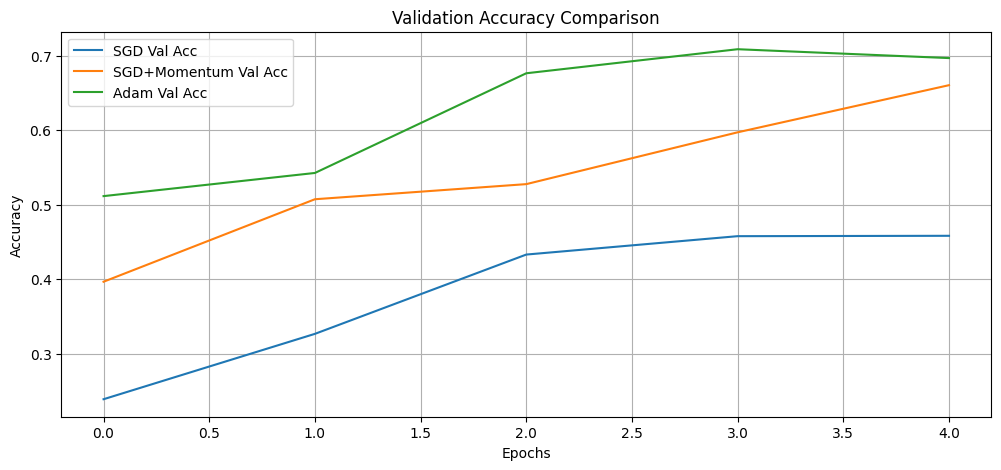

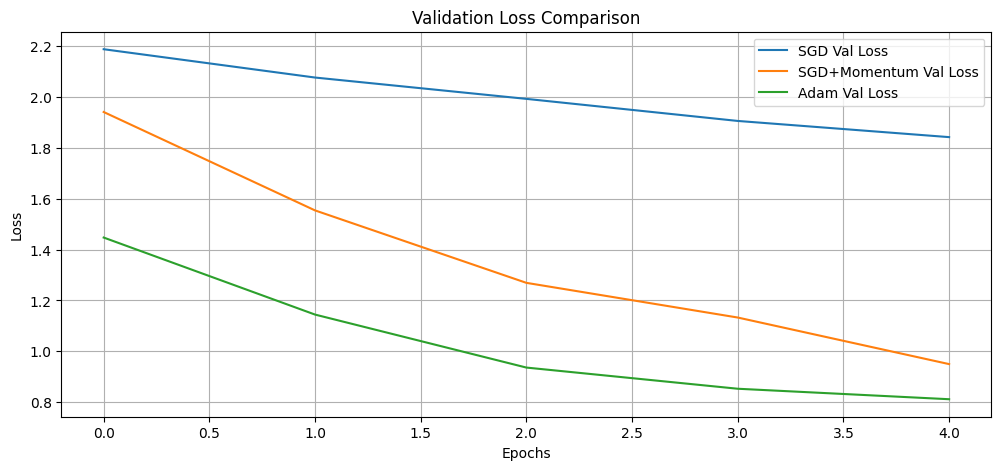

In [7]:
plt.figure(figsize=(12, 5))
for name, (_, history) in histories.items():
    plt.plot(history.history['val_accuracy'], label=f"{name} Val Acc")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12, 5))
for name, (_, history) in histories.items():
    plt.plot(history.history['val_loss'], label=f"{name} Val Loss")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend(); plt.grid(); plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


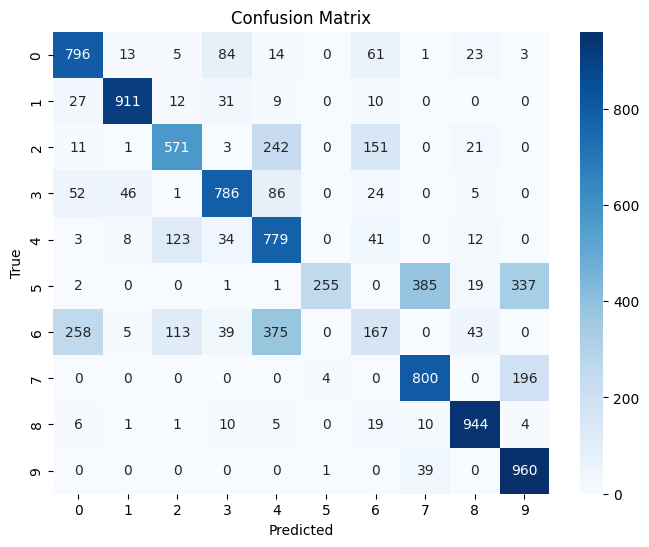


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      1000
           1       0.92      0.91      0.92      1000
           2       0.69      0.57      0.63      1000
           3       0.80      0.79      0.79      1000
           4       0.52      0.78      0.62      1000
           5       0.98      0.26      0.40      1000
           6       0.35      0.17      0.23      1000
           7       0.65      0.80      0.72      1000
           8       0.88      0.94      0.91      1000
           9       0.64      0.96      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.67     10000
weighted avg       0.71      0.70      0.67     10000



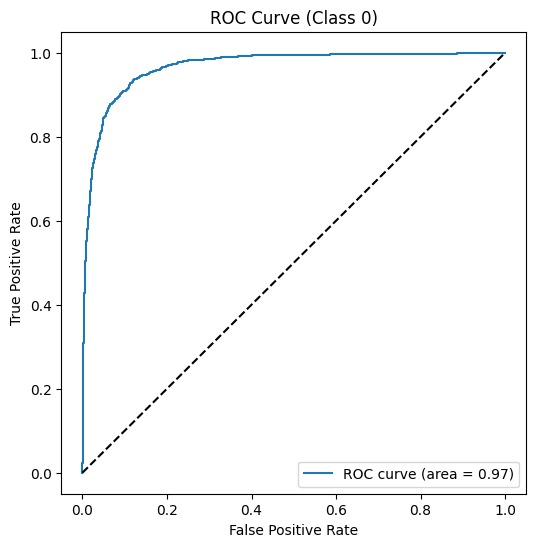

In [8]:
best_model = histories["Adam"][0]
y_pred_probs = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


fpr, tpr, _ = roc_curve(y_test_cat[:, 0], y_pred_probs[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (Class 0)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(loc="lower right"); plt.show()